In [88]:
#importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from sklearn.cluster import KMeans

In [94]:
df = pd.read_csv(r"Perceus1.csv")#,sep='\t',encoding = "utf-8"
df.head()

,_r ( arcsec ),MAIN_ID,OTYPE,"RA ( ""h:m:s"" )","DEC ( ""d:m:s"" )",COO_ERR_MAJA ( mas ),COO_ERR_MINA ( mas ),COO_ERR_ANGLE ( deg ),PMRA ( mas.yr-1 ),PMDEC ( mas.yr-1 ),...,J ( mag ),H ( mag ),K ( mag ),SP_TYPE,GALDIM_MAJAXIS ( arcmin ),GALDIM_MINAXIS ( arcmin ),GALDIM_ANGLE ( deg ),BIBLIST,RAdeg ( deg ),DEdeg ( deg )
0,54.2951,LAMOST J022548.15+571357.7,WD*,02 25 48.15871,+57 13 57.7565,0.017,0.021,90.0,-0.170,0.283,...,13.262,13.076,13.012,DA:,NaN,NaN,NaN,1,36.450661,57.232710
1,96.6792,HD 14837,Star,02 25 37.42345,+57 11 58.3948,0.023,0.028,90.0,-0.367,-1.286,...,9.006,8.978,9.014,B8,NaN,NaN,NaN,6,36.405931,57.199554
2,110.6654,TYC 3694-1233-1,Star,02 25 52.91335,+57 12 09.2168,0.024,0.029,90.0,15.229,-7.930,...,9.374,9.242,9.172,NaN,NaN,NaN,NaN,0,36.470472,57.202560
3,114.2092,BD+56 618,Star,02 25 54.82977,+57 14 24.7362,0.023,0.030,90.0,-0.385,-1.211,...,9.545,9.473,9.509,OB-,NaN,NaN,NaN,6,36.478457,57.240205
4,118.1138,TYC 3694-1157-1,Star,02 25 35.12465,+57 15 04.0870,0.022,0.026,90.0,-0.532,-1.263,...,10.970,10.922,10.889,NaN,NaN,NaN,NaN,0,36.396353,57.251135


In [96]:
#Selecting only necessary columns
df1=df[['RAdeg ( deg )','DEdeg ( deg )']]
# df1 = df1.dropna()
print(df1.shape)
df1.head(30)

(1000, 2)


,RAdeg ( deg ),DEdeg ( deg )
0,36.450661,57.232710
1,36.405931,57.199554
2,36.470472,57.202560
3,36.478457,57.240205
4,36.396353,57.251135
5,36.460703,57.254224
6,36.453751,57.177109
7,36.451974,57.155466
8,36.388833,57.290061
9,36.544129,57.266702


In [ ]:
#filter only stars in df1 and non-NaN values
print(df1.shape)
# df1=df1[df1['OTYPE']=='Star']
# df1=df1.drop('OTYPE',axis=1)
print(df1.shape)

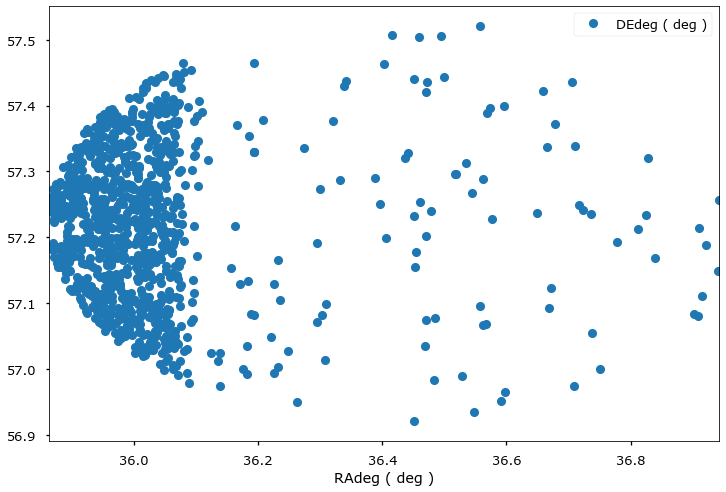

In [98]:
df1.plot(x='RAdeg ( deg )', y='DEdeg ( deg )', style='o')
# df1.plot(x='_RA.icrs ( deg )', y='_DE.icrs ( deg )', style='o')

C:\Users\rtut6\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


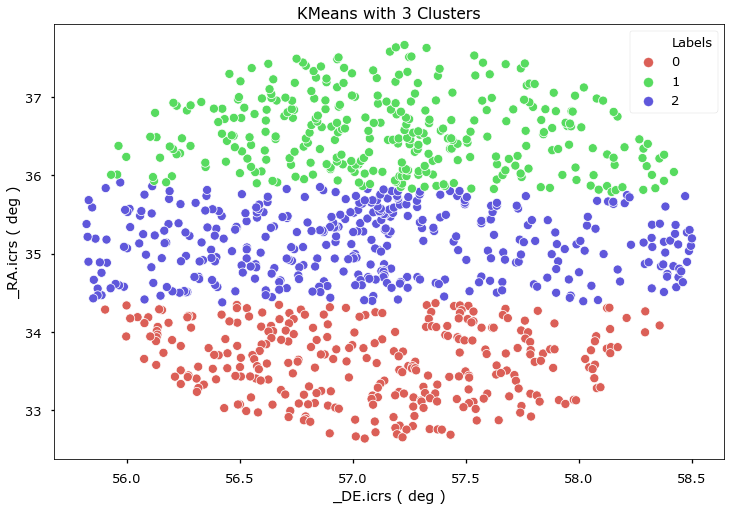

In [92]:
km3 = KMeans(n_clusters=3).fit(df1)
df1['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(df1['_DE.icrs ( deg )'],df1['_RA.icrs ( deg )'], hue=df1['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

In [63]:
# We have to clusterize the df1 due to find a relative number of sturs in two clusters of Perceus
kmeans=KMeans(n_clusters=3)
kmeans.fit(df1)
kmeans.cluster_centers_

array([[36.00056506, 57.12333096],
       [36.57097456, 57.23311026],
       [35.98481327, 57.30522496]])

In [66]:
from sklearn.svm import SVC
param_range = np.linspace(0.1, 8, 15)
param_name="C"
scvr = SVC(kernel = 'rbf')
validation_curve_model(df1.values,df_y.values,scvr, param_name, param_range, cv, ylim=ylim,log=False)
plt.axvline(x=5)
svcrbf = SVC(kernel = 'rbf', C=5)
learning_curve_model(df_features.values,df_y.values, svcrbf, cv, train_size, ylim=ylim)
plt.axhline(y=0.97)
svcrbf = SVC(kernel = 'rbf',probability=True, C=5)
BoundaryLine('linear',svcrbf, "Support Vector - rbf")

NameError: name 'validation_curve_model' is not defined

In [64]:
kmeans.predict(df1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 2, 0, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0,
       2, 0, 2, 2, 1, 2, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2,
       1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 1, 2, 2, 0, 1, 0,
       2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0,

## Выявление сообществ с помощью спектральной на матрице схожести
* Загрузим граф из `nested_partition.gml`. Это граф, построенный с помощью [генератора](https://sites.google.com/view/santofortunato/inthepress2) Benchmark сетей для тестов алгоритмов выявления сообществ.
* Визуализируем матрицу смежности графа с помощью метода `plt.spy(A)` (и саму сеть, если получится)
* Рассчитаем реализованные в `nexworkx` меры схожести вершин

По большому счету, полученные схожести можно подавать на вход любому алгоритму кластеризации, который изначально может работать со мерами близости (например аггломеративная кластеризация)

In [ ]:
g = nx.read_gml('./data/nested_partition.gml', label='id')

In [ ]:
g.number_of_nodes()

In [ ]:
A = nx.adj_matrix(g)
plt.spy(A, markersize=2)

In [ ]:
# Что бы мы увидили в реальной жизни
idx = np.random.permutation(range(128))
i = np.ix_(idx, idx)
plt.spy(A[i], markersize=2)

In [ ]:
# Все положительные похожести по Жаккару
jac = nx.jaccard_coefficient(g)
jac = np.array(list(jac))

In [ ]:
jac

In [ ]:
# Немного магии, чтобы получить из этого матрицу попарных СХОЖЕСТЕЙ по жаккару
from scipy.sparse import coo_matrix

# Переводим все в формат разреженной матрицы
D = coo_matrix((jac[:,2], (jac[:,0], jac[:,1])), shape=(128,128))

# Делаем ее симметричной
D = D+D.T

In [ ]:
plt.imshow(D.toarray())

In [ ]:
# Попробуем посчитать на этой близости спектральную кластеризацию
from sklearn.cluster import SpectralClustering

In [ ]:
model = SpectralClustering(n_clusters=4, affinity='precomputed')
model.fit(D)


In [ ]:
labels = model.labels_

In [ ]:
true_labeling = list(nx.get_node_attributes(g, 'label').values())

In [ ]:
layout = nx.layout.spectral_layout(g)
nx.draw(g, pos=layout, node_color=true_labeling,)

In [ ]:
nx.draw(g, pos=layout, node_color=labels)

In [ ]:
# Функция, которая из разбиения получает разметку для каждого объекта
def get_labeling_from_partition(partition):
    
    all_nodes = set()
    for cluster in partition:
        all_nodes |= cluster
    num_nodes = len(all_nodes)
    labeling = np.ones((num_nodes,), dtype=int)

    for label, ids in enumerate(partition):
        ids = list(ids)
        labeling[ids] = label
        
    return labeling

In [ ]:
lp_labeling = get_labeling_from_partition(lp_partition)

In [ ]:
nx.draw(g, pos=layout, node_color=lp_labeling)

## Edge betweenness

In [ ]:
eb_partitions = nx.community.girvan_newman(g)

In [ ]:
k = 4 # Вернем разбиение на k сообщества
for partition in eb_partitions:
    if len(partition) == k:
        break

In [ ]:
eb_partition

In [ ]:
eb_labeling = get_labeling_from_partition(eb_partition)

In [ ]:
eb_labeling

In [ ]:
nx.draw(g, pos=layout, node_color=eb_labeling)

### Modularity

In [ ]:
# Просто функция, которая считает модулярность
from itertools import product
def modularity(G, communities, weight='weight'):
    multigraph = G.is_multigraph()
    directed = G.is_directed()
    m = G.size(weight=weight)
    if directed:
        out_degree = dict(G.out_degree(weight=weight))
        in_degree = dict(G.in_degree(weight=weight))
        norm = 1 / m
    else:
        out_degree = dict(G.degree(weight=weight))
        in_degree = out_degree
        norm = 1 / (2 * m)

    def val(u, v):
        try:
            if multigraph:
                w = sum(d.get(weight, 1) for k, d in G[u][v].items())
            else:
                w = G[u][v].get(weight, 1)
        except KeyError:
            w = 0
        # Double count self-loops if the graph is undirected.
        if u == v and not directed:
            w *= 2
        return w - in_degree[u] * out_degree[v] * norm

    Q = sum(val(u, v) for c in communities for u, v in product(c, repeat=2))
    return Q * norm

In [ ]:
eb_partitions = nx.community.girvan_newman(g)

In [ ]:
# Посчитаем модулярность для разбиений на 1,2,..10 сообществ
for partition in eb_partitions:
    num_com = len(partition)
    if num_com < 10:
        mod = modularity(g, partition)
        print('For {} communities modularity = {}'.format(num_com, mod))
    else:
        break